In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import os

# Define the directory path in Google Drive
directory_path = '/content/drive/MyDrive/Merged_data'

# List of filenames
file_names = [
    "final_merged_data_AAPL.csv",
    "final_merged_data_FTSE 100.csv",
    "final_merged_data_NYSE.csv",
    "final_merged_data_S&P 500.csv"
]

# Dictionary to store DataFrames
data_frames = {}

# Load files
for file_name in file_names:
    file_path = os.path.join(directory_path, file_name)
    print(f"Loading {file_name} from Google Drive...")
    df = pd.read_csv(file_path, parse_dates=['Date'])
    df.set_index('Date', inplace=True)  # Set Date column as index
    data_frames[file_name] = df

# Display loaded DataFrames
for name, df in data_frames.items():
    print(f"\n{name}:")
    print(df.info())


Loading final_merged_data_AAPL.csv from Google Drive...
Loading final_merged_data_FTSE 100.csv from Google Drive...
Loading final_merged_data_NYSE.csv from Google Drive...
Loading final_merged_data_S&P 500.csv from Google Drive...

final_merged_data_AAPL.csv:
<class 'pandas.core.frame.DataFrame'>
Index: 2267 entries, 01/10/2015 to 01/10/2024
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Open                    2267 non-null   float64
 1   High                    2267 non-null   float64
 2   Low                     2267 non-null   float64
 3   Close                   2267 non-null   float64
 4   Volume                  2267 non-null   int64  
 5   Dividends               2267 non-null   float64
 6   Stock Splits            2267 non-null   int64  
 7   raw_return              2266 non-null   float64
 8   log_return              2266 non-null   float64
 9   price                   2267 non-nu

In [3]:
# Clean and preprocess each dataset
for asset_name, df in data_frames.items():
    print(f"\nCleaning dataset: {asset_name}...")

    # Convert `log_volume` to numeric if it is of type object
    if 'log_volume' in df.columns and df['log_volume'].dtype == 'object':
        print(f"Converting log_volume to numeric for {asset_name}")
        df['log_volume'] = pd.to_numeric(df['log_volume'], errors='coerce')

    # Drop columns with all missing values (like dp)
    missing_cols = df.columns[df.isnull().all()]
    if len(missing_cols) > 0:
        print(f"Dropping columns with all missing values: {list(missing_cols)}")
        df.drop(columns=missing_cols, inplace=True)

    # Columns to interpolate
    interpolate_cols = [
        'log_return', 'ma_10', 'ma_50', 'ma_200',
        'google_trends_interest', 'twitter_sentiment', 'reddit_sentiment'
    ]

    for col in interpolate_cols:
        if col in df.columns:
            print(f"Interpolating missing values for {col} in {asset_name}")
            df[col].interpolate(method='linear', inplace=True)  # Interpolate

    # Replace any remaining NaNs with 0
    if df.isnull().values.any():
        print(f"Replacing remaining NaNs with 0 in {asset_name}")
        df.fillna(0, inplace=True)

    # Standardize column names
    df.columns = [col.lower().replace(" ", "_") for col in df.columns]

    # Save the cleaned DataFrame back to the dictionary
    data_frames[asset_name] = df

# Verify cleaned datasets
for asset_name, df in data_frames.items():
    print(f"\n--- Cleaned dataset: {asset_name} ---")
    print(df.info())
    print(df.head())



Cleaning dataset: final_merged_data_AAPL.csv...
Interpolating missing values for log_return in final_merged_data_AAPL.csv
Interpolating missing values for google_trends_interest in final_merged_data_AAPL.csv
Interpolating missing values for twitter_sentiment in final_merged_data_AAPL.csv
Interpolating missing values for reddit_sentiment in final_merged_data_AAPL.csv
Replacing remaining NaNs with 0 in final_merged_data_AAPL.csv

Cleaning dataset: final_merged_data_FTSE 100.csv...
Converting log_volume to numeric for final_merged_data_FTSE 100.csv
Dropping columns with all missing values: ['dp']
Interpolating missing values for log_return in final_merged_data_FTSE 100.csv
Interpolating missing values for google_trends_interest in final_merged_data_FTSE 100.csv
Interpolating missing values for twitter_sentiment in final_merged_data_FTSE 100.csv
Interpolating missing values for reddit_sentiment in final_merged_data_FTSE 100.csv
Replacing remaining NaNs with 0 in final_merged_data_FTSE 100

<ipython-input-3-7021860923ba>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].interpolate(method='linear', inplace=True)  # Interpolate
<ipython-input-3-7021860923ba>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

                    open          high           low         close  \
Date                                                                 
01/10/2015   9832.330078   9865.049805   9720.849609   9820.950195   
02/10/2015   9755.780273   9973.559570   9697.269531   9973.559570   
05/10/2015  10035.860350  10176.980470  10035.860350  10167.929690   
06/10/2015  10167.500000  10205.110350  10124.919920  10156.379880   
07/10/2015  10212.349610  10284.259770  10168.009770  10258.519530   

                volume  dividends  stock_splits  raw_return  log_return  \
Date                                                                      
01/10/2015  3983600000          0             0    0.000000    0.000000   
02/10/2015  4378570000          0             0    0.015539    0.015420   
05/10/2015  4334490000          0             0    0.019489    0.019301   
06/10/2015  4202400000          0             0   -0.001136   -0.001137   
07/10/2015  4666470000          0             0    0.010057

Processing dataset: final_merged_data_AAPL.csv


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will 

Metrics for final_merged_data_AAPL.csv: {'MSE': 0.0003439672134048814, 'MAE': 0.012939548367494393, 'R²': -0.022765886590661255}


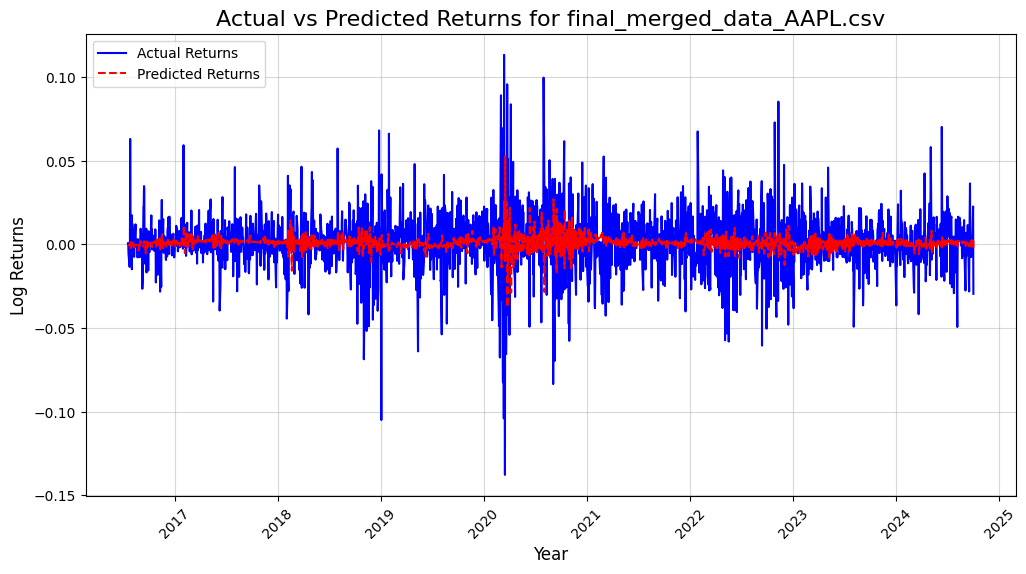

Correlation matrix for final_merged_data_AAPL.csv:

                        predicted_returns  prediction_errors  \
predicted_returns                1.000000          -0.158677   
prediction_errors               -0.158677           1.000000   
twitter_sentiment                0.059654           0.016622   
reddit_sentiment                 0.029028           0.013324   
google_trends_interest           0.131041          -0.038504   

                        twitter_sentiment  reddit_sentiment  \
predicted_returns                0.059654          0.029028   
prediction_errors                0.016622          0.013324   
twitter_sentiment                1.000000          0.052661   
reddit_sentiment                 0.052661          1.000000   
google_trends_interest           0.175420         -0.052701   

                        google_trends_interest  
predicted_returns                     0.131041  
prediction_errors                    -0.038504  
twitter_sentiment                    

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will resul

Metrics for final_merged_data_FTSE 100.csv: {'MSE': 9.751374321444936e-05, 'MAE': 0.0064943208307480784, 'R²': -0.060397723894820565}


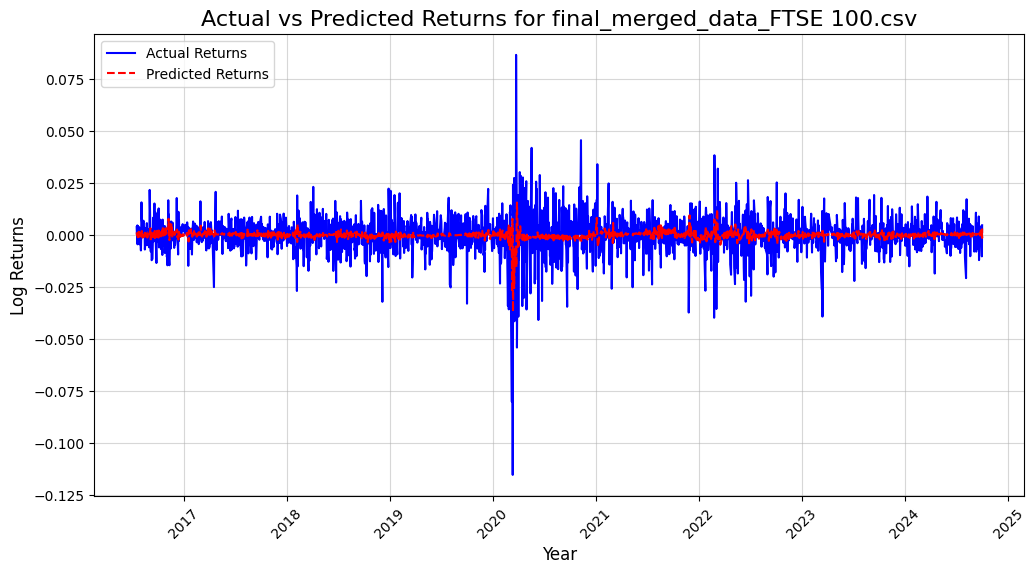

Correlation matrix for final_merged_data_FTSE 100.csv:

                        predicted_returns  prediction_errors  \
predicted_returns                1.000000          -0.242703   
prediction_errors               -0.242703           1.000000   
twitter_sentiment               -0.035083           0.036062   
reddit_sentiment                 0.000254           0.017562   
google_trends_interest          -0.058402           0.031536   

                        twitter_sentiment  reddit_sentiment  \
predicted_returns               -0.035083          0.000254   
prediction_errors                0.036062          0.017562   
twitter_sentiment                1.000000         -0.004130   
reddit_sentiment                -0.004130          1.000000   
google_trends_interest           0.087909          0.192052   

                        google_trends_interest  
predicted_returns                    -0.058402  
prediction_errors                     0.031536  
twitter_sentiment                

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will resul

Metrics for final_merged_data_NYSE.csv: {'MSE': 0.00013062878018020441, 'MAE': 0.007065859931995954, 'R²': -0.08266558109016442}


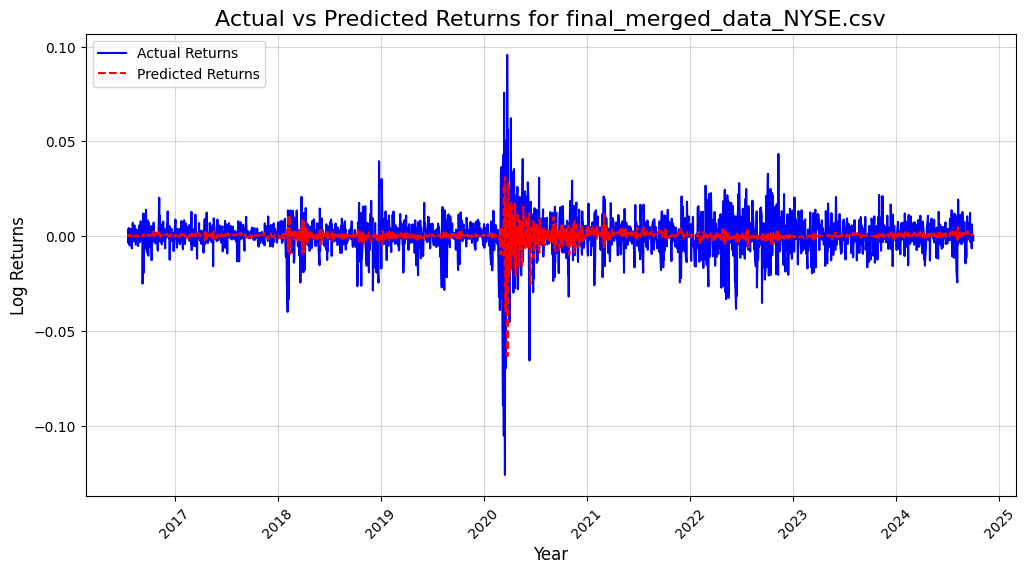

Correlation matrix for final_merged_data_NYSE.csv:

                        predicted_returns  prediction_errors  \
predicted_returns                1.000000          -0.276396   
prediction_errors               -0.276396           1.000000   
twitter_sentiment                0.051206           0.005139   
reddit_sentiment                -0.013366           0.043053   
google_trends_interest           0.043573           0.013325   

                        twitter_sentiment  reddit_sentiment  \
predicted_returns                0.051206         -0.013366   
prediction_errors                0.005139          0.043053   
twitter_sentiment                1.000000          0.043691   
reddit_sentiment                 0.043691          1.000000   
google_trends_interest           0.039160          0.271993   

                        google_trends_interest  
predicted_returns                     0.043573  
prediction_errors                     0.013325  
twitter_sentiment                    

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will resul

Metrics for final_merged_data_S&P 500.csv: {'MSE': 0.00014153374187251432, 'MAE': 0.0075001177782568745, 'R²': -0.05085875745032853}


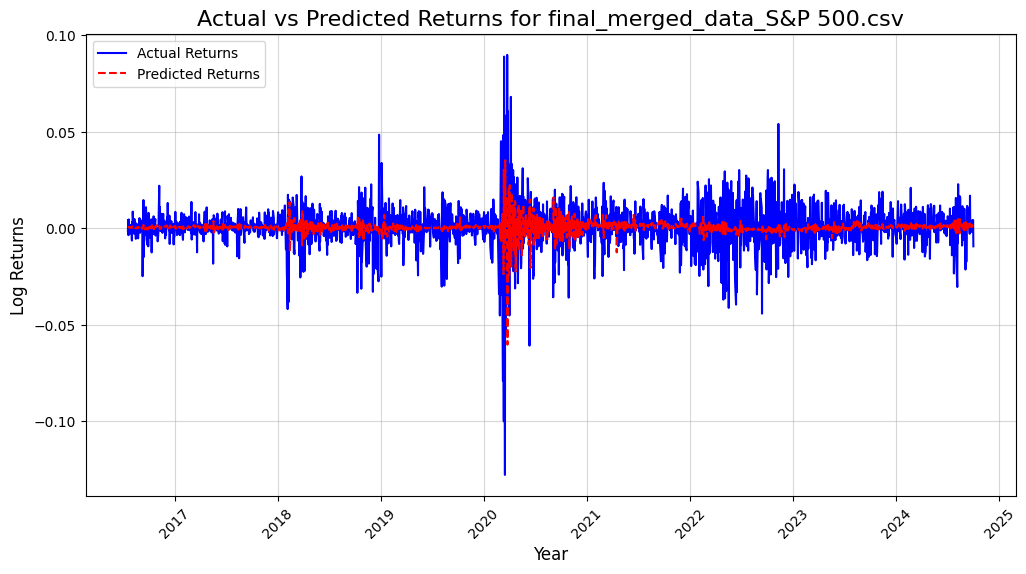

Correlation matrix for final_merged_data_S&P 500.csv:

                        predicted_returns  prediction_errors  \
predicted_returns                1.000000          -0.224337   
prediction_errors               -0.224337           1.000000   
twitter_sentiment               -0.061041           0.023704   
reddit_sentiment                 0.026318           0.003361   
google_trends_interest          -0.012700           0.015970   

                        twitter_sentiment  reddit_sentiment  \
predicted_returns               -0.061041          0.026318   
prediction_errors                0.023704          0.003361   
twitter_sentiment                1.000000         -0.050261   
reddit_sentiment                -0.050261          1.000000   
google_trends_interest          -0.483937          0.256266   

                        google_trends_interest  
predicted_returns                    -0.012700  
prediction_errors                     0.015970  
twitter_sentiment                 

In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter

# Rolling ARIMA Fitting and Prediction Function
def rolling_arima(data, window_size=200):
    """
    Apply rolling ARIMA(2,0,2) to the given dataset.

    Args:
        data (pd.DataFrame): The dataset containing 'log_return'.
        window_size (int): Rolling window size.

    Returns:
        pd.DataFrame: Dataframe with predicted returns and errors.
    """
    n = len(data)
    predictions = []
    errors = []

    for i in range(n - window_size):
        train_data = data['log_return'].iloc[i:i + window_size]
        try:
            # Fit ARIMA(2,0,2)
            model = ARIMA(train_data, order=(2, 0, 2))
            fitted_model = model.fit()

            # Forecast the next value
            forecast = fitted_model.forecast(steps=1).iloc[0]
            actual = data['log_return'].iloc[i + window_size]

            # Append predictions and errors
            predictions.append(forecast)
            errors.append(actual - forecast)
        except Exception as e:
            # Handle errors in fitting/prediction
            predictions.append(np.nan)
            errors.append(np.nan)

    # Align results
    result = data.iloc[window_size:].copy()
    result['predicted_returns'] = predictions
    result['prediction_errors'] = errors
    return result

# Metrics Calculation Function
def evaluate_metrics(data):
    """
    Evaluate MSE, MAE, and R² for actual vs predicted returns.

    Args:
        data (pd.DataFrame): Dataframe containing 'log_return' and 'predicted_returns'.

    Returns:
        dict: Dictionary containing MSE, MAE, and R².
    """
    mse = mean_squared_error(data['log_return'], data['predicted_returns'], squared=True)
    mae = mean_absolute_error(data['log_return'], data['predicted_returns'])
    r_squared = 1 - (np.sum((data['log_return'] - data['predicted_returns'])**2) /
                     np.sum((data['log_return'] - np.mean(data['log_return']))**2))
    return {'MSE': mse, 'MAE': mae, 'R²': r_squared}

# Improved Plotting Function
def plot_predictions(data, dataset_name):
    """
    Plot actual vs predicted log returns.

    Args:
        data (pd.DataFrame): Dataframe containing actual and predicted returns.
        dataset_name (str): Name of the dataset for the plot title.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['log_return'], label="Actual Returns", color='blue', linewidth=1.5)
    plt.plot(data.index, data['predicted_returns'], label="Predicted Returns", color='red', linestyle='dashed', linewidth=1.5)

    # Formatting
    plt.title(f"Actual vs Predicted Returns for {dataset_name}", fontsize=16)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Log Returns", fontsize=12)
    plt.legend(loc='upper left')
    plt.grid(alpha=0.5)
    plt.gca().xaxis.set_major_locator(YearLocator())
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
    plt.xticks(rotation=45)

    # Save the plot
    plt.savefig(f"{dataset_name}_predictions.png", dpi=300)
    plt.show()

# Correlation Matrix Function
def compute_correlation_matrix(data):
    """
    Compute correlation matrix for key columns.

    Args:
        data (pd.DataFrame): Dataframe containing columns to correlate.

    Returns:
        pd.DataFrame: Correlation matrix.
    """
    relevant_columns = ['predicted_returns', 'prediction_errors', 'twitter_sentiment', 'reddit_sentiment', 'google_trends_interest']
    cor_matrix = data[relevant_columns].corr()
    return cor_matrix

# Main Execution
datasets_results = {}
metrics_results = {}

for dataset_name, dataset in data_frames.items():
    print(f"Processing dataset: {dataset_name}")

    # Ensure proper datetime formatting
    dataset.index = pd.to_datetime(dataset.index, format='%d/%m/%Y')

    # Apply rolling ARIMA
    results = rolling_arima(dataset)
    datasets_results[dataset_name] = results

    # Evaluate metrics
    metrics = evaluate_metrics(results)
    metrics_results[dataset_name] = metrics
    print(f"Metrics for {dataset_name}: {metrics}")

    # Generate and save plot
    plot_predictions(results, dataset_name)

    # Compute correlation matrix
    print(f"Correlation matrix for {dataset_name}:\n")
    cor_matrix = compute_correlation_matrix(results)
    print(cor_matrix)

# Save Results and Metrics
for name, result in datasets_results.items():
    result.to_csv(f"{name}_arima_results.csv")
    print(f"Saved results for {name}.")

metrics_df = pd.DataFrame(metrics_results).T
metrics_df.to_csv("arima_metrics_summary.csv")
print("Saved metrics summary.")


Creating correlation matrix heatmap for final_merged_data_AAPL.csv...
Correlation matrix heatmap saved as final_merged_data_AAPL.csv_correlation_matrix.png


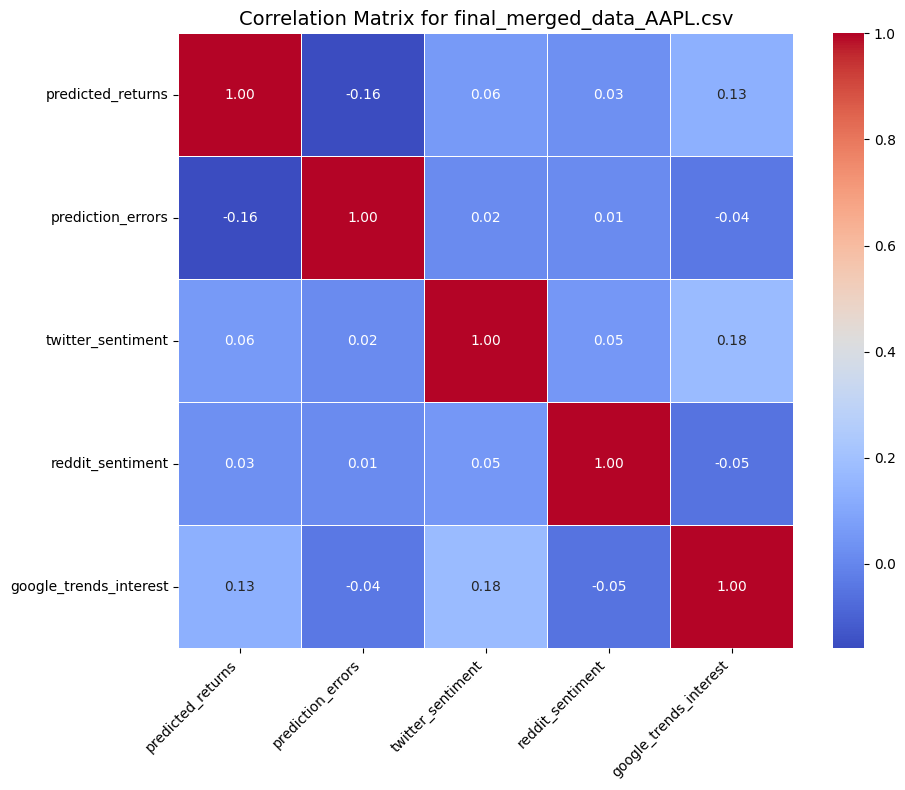

Creating correlation matrix heatmap for final_merged_data_FTSE 100.csv...
Correlation matrix heatmap saved as final_merged_data_FTSE 100.csv_correlation_matrix.png


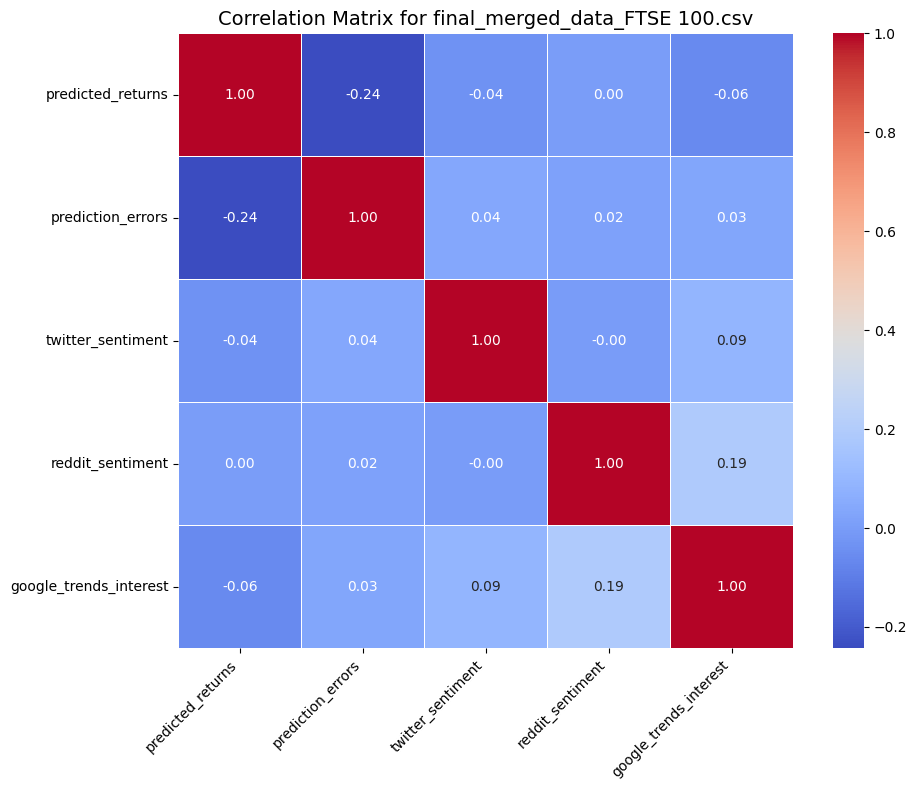

Creating correlation matrix heatmap for final_merged_data_NYSE.csv...
Correlation matrix heatmap saved as final_merged_data_NYSE.csv_correlation_matrix.png


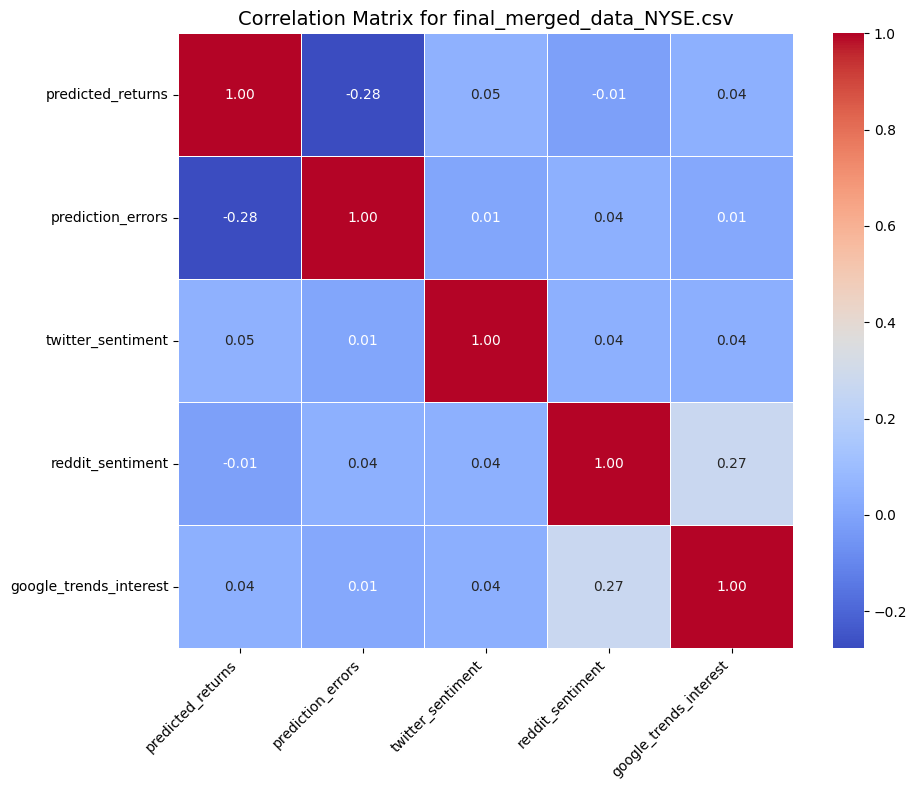

Creating correlation matrix heatmap for final_merged_data_S&P 500.csv...
Correlation matrix heatmap saved as final_merged_data_S&P 500.csv_correlation_matrix.png


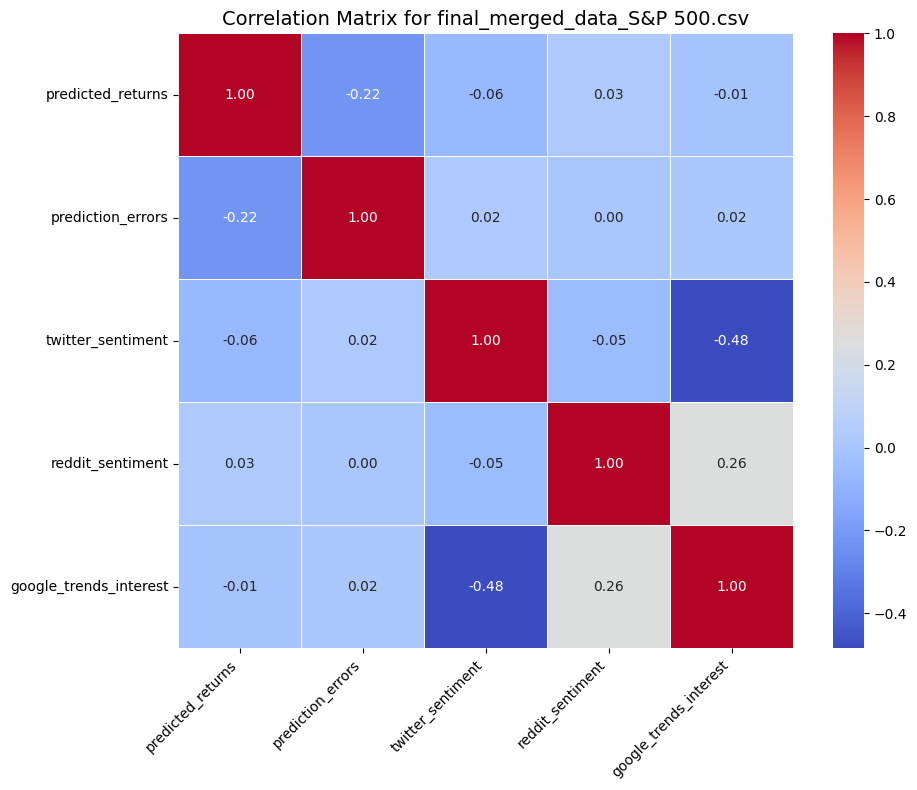

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to visualize the correlation matrix as a heatmap
def plot_correlation_matrix(cor_matrix, dataset_name):
    """
    Plot a heatmap of the correlation matrix for a dataset.

    Args:
        cor_matrix (pd.DataFrame): Correlation matrix to visualize.
        dataset_name (str): Name of the dataset for the title and filename.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cor_matrix,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        cbar=True,
        square=True,
        linewidths=0.5,
        annot_kws={"size": 10}
    )
    plt.title(f"Correlation Matrix for {dataset_name}", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    # Save the heatmap as a PNG image
    plt.savefig(f"{dataset_name}_correlation_matrix.png", dpi=300)
    print(f"Correlation matrix heatmap saved as {dataset_name}_correlation_matrix.png")
    plt.show()

# Generate and save correlation matrix heatmaps
for dataset_name, dataset in datasets_results.items():
    print(f"Creating correlation matrix heatmap for {dataset_name}...")
    cor_matrix = compute_correlation_matrix(dataset)  # Compute correlation matrix using the function above
    plot_correlation_matrix(cor_matrix, dataset_name)


Processing dataset: final_merged_data_AAPL.csv


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does

Metrics for final_merged_data_AAPL.csv: {'MSE': 1.2854504770394004e-05, 'MAE': 0.000859697875858732, 'R²': 0.9617779007538707}


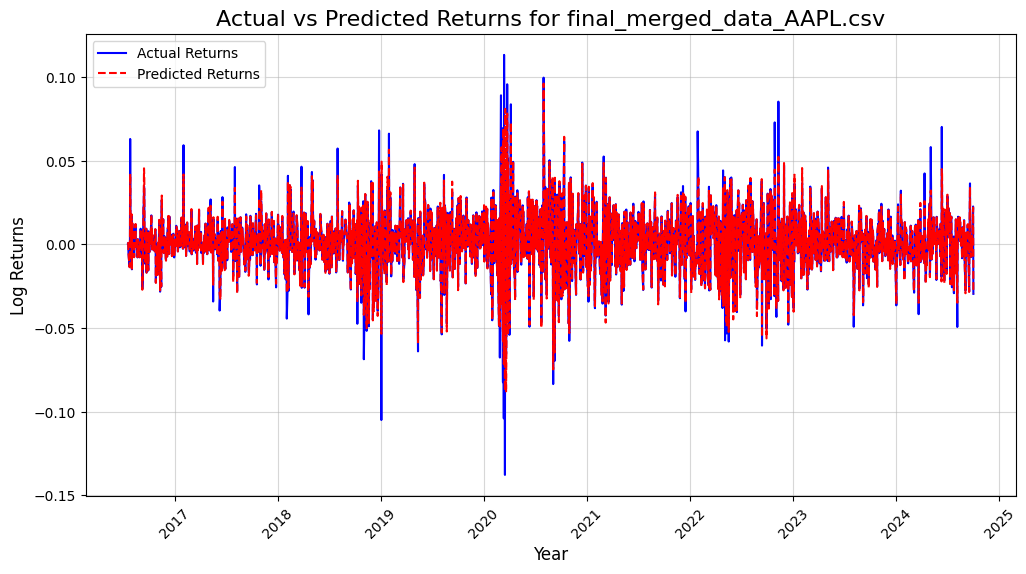

Processing dataset: final_merged_data_FTSE 100.csv


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does

Metrics for final_merged_data_FTSE 100.csv: {'MSE': 6.744180675889142e-06, 'MAE': 0.00046149324577773654, 'R²': 0.9266614776286366}


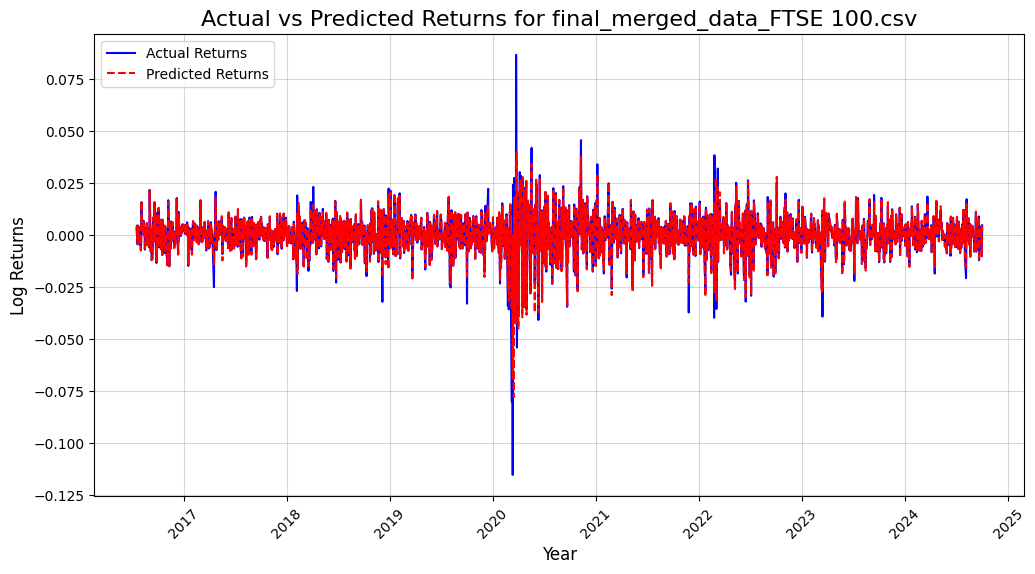

Processing dataset: final_merged_data_NYSE.csv


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does

Metrics for final_merged_data_NYSE.csv: {'MSE': 9.853362603092152e-06, 'MAE': 0.000536743108653753, 'R²': 0.9183342557922356}


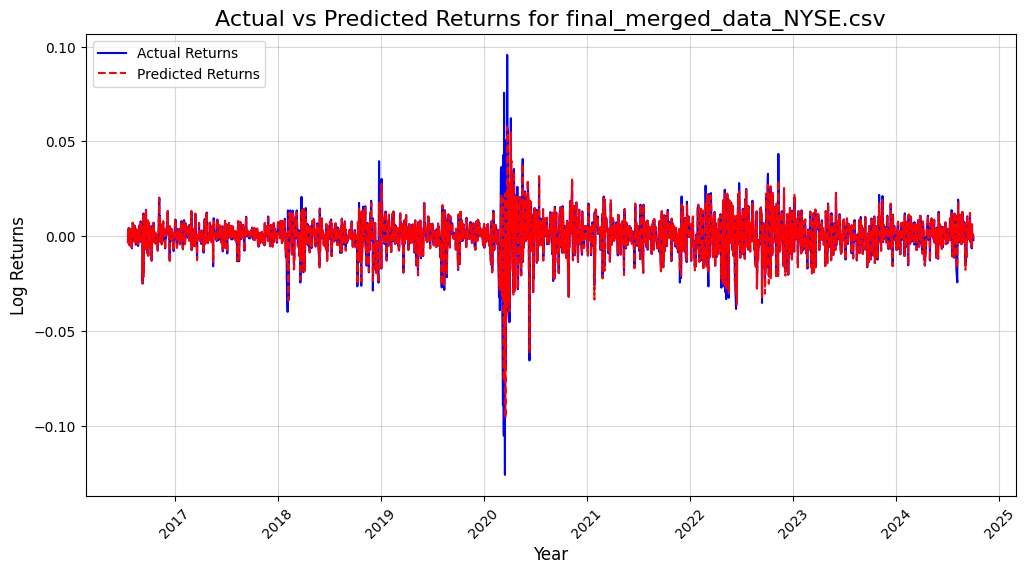

Processing dataset: final_merged_data_S&P 500.csv


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does

Metrics for final_merged_data_S&P 500.csv: {'MSE': 8.984069810130872e-06, 'MAE': 0.000575606066188862, 'R²': 0.9332951399954856}


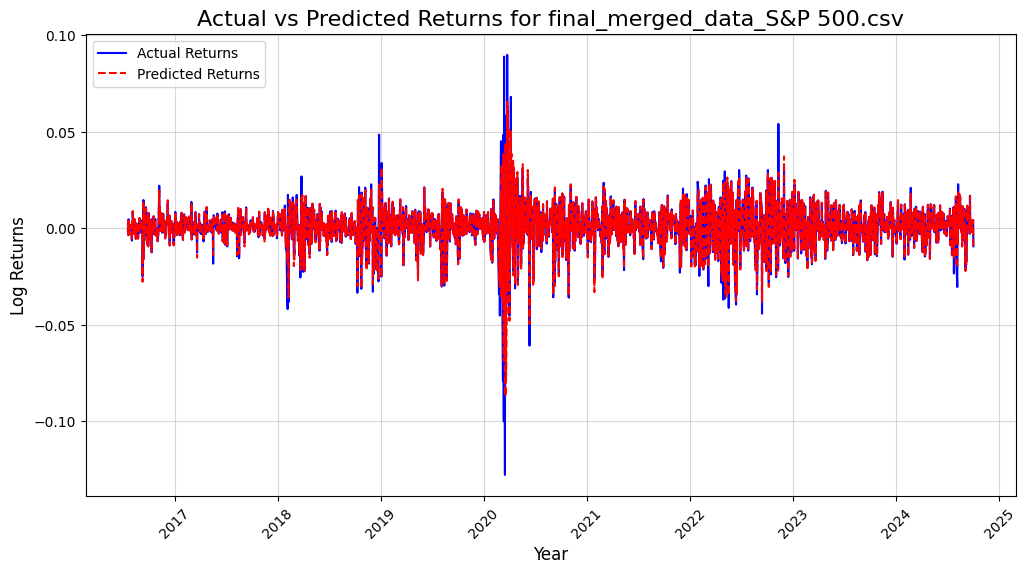

Saved results for final_merged_data_AAPL.csv.
Saved results for final_merged_data_FTSE 100.csv.
Saved results for final_merged_data_NYSE.csv.
Saved results for final_merged_data_S&P 500.csv.
Saved metrics summary.


In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter

# Rolling Random Forest Function
def rolling_random_forest(data, window_size=200, n_estimators=100):
    """
    Apply rolling Random Forest to the given dataset.

    Args:
        data (pd.DataFrame): The dataset containing predictors and 'log_return'.
        window_size (int): Rolling window size.
        n_estimators (int): Number of trees in the forest.

    Returns:
        pd.DataFrame: Dataframe with predicted returns and errors.
    """
    n = len(data)
    predictions = []
    errors = []

    for i in range(n - window_size):
        train_data = data.iloc[i:i + window_size]
        test_data = data.iloc[i + window_size]

        # Prepare training and testing sets
        X_train = train_data.drop(columns=['log_return'])
        y_train = train_data['log_return']
        X_test = test_data.drop(labels=['log_return'])

        # Fit Random Forest model
        rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
        rf.fit(X_train, y_train)

        # Predict and calculate error
        forecast = rf.predict([X_test.values])[0]
        actual = test_data['log_return']

        # Append results
        predictions.append(forecast)
        errors.append(actual - forecast)

    # Align results
    result = data.iloc[window_size:].copy()
    result['predicted_returns'] = predictions
    result['prediction_errors'] = errors
    return result

# Metrics Calculation Function
def evaluate_metrics(data):
    """
    Evaluate MSE, MAE, and R² for actual vs predicted returns.

    Args:
        data (pd.DataFrame): Dataframe containing 'log_return' and 'predicted_returns'.

    Returns:
        dict: Dictionary containing MSE, MAE, and R².
    """
    mse = mean_squared_error(data['log_return'], data['predicted_returns'], squared=True)
    mae = mean_absolute_error(data['log_return'], data['predicted_returns'])
    r_squared = 1 - (np.sum((data['log_return'] - data['predicted_returns'])**2) /
                     np.sum((data['log_return'] - np.mean(data['log_return']))**2))
    return {'MSE': mse, 'MAE': mae, 'R²': r_squared}

# Plotting Function
def plot_predictions(data, dataset_name):
    """
    Plot actual vs predicted log returns.

    Args:
        data (pd.DataFrame): Dataframe containing actual and predicted returns.
        dataset_name (str): Name of the dataset for the plot title.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['log_return'], label="Actual Returns", color='blue', linewidth=1.5)
    plt.plot(data.index, data['predicted_returns'], label="Predicted Returns", color='red', linestyle='dashed', linewidth=1.5)

    # Formatting
    plt.title(f"Actual vs Predicted Returns for {dataset_name}", fontsize=16)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Log Returns", fontsize=12)
    plt.legend(loc='upper left')
    plt.grid(alpha=0.5)
    plt.gca().xaxis.set_major_locator(YearLocator())
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
    plt.xticks(rotation=45)

    # Save the plot
    plt.savefig(f"{dataset_name}_rf_predictions.png", dpi=300)
    plt.show()

# Main Execution
datasets_results = {}
metrics_results = {}

for dataset_name, dataset in data_frames.items():
    print(f"Processing dataset: {dataset_name}")

    # Ensure proper datetime formatting
    dataset.index = pd.to_datetime(dataset.index, format='%d/%m/%Y')

    # Apply rolling Random Forest
    results = rolling_random_forest(dataset)
    datasets_results[dataset_name] = results

    # Evaluate metrics
    metrics = evaluate_metrics(results)
    metrics_results[dataset_name] = metrics
    print(f"Metrics for {dataset_name}: {metrics}")

    # Generate and save plot
    plot_predictions(results, dataset_name)

# Save Results and Metrics
for name, result in datasets_results.items():
    result.to_csv(f"{name}_rf_results.csv")
    print(f"Saved results for {name}.")

metrics_df = pd.DataFrame(metrics_results).T
metrics_df.to_csv("rf_metrics_summary.csv")
print("Saved metrics summary.")


Processing dataset: final_merged_data_AAPL.csv
Metrics for final_merged_data_AAPL.csv: {'MSE': 8.677242625182503e-06, 'MAE': 0.0006671998042270219, 'R²': 0.9741987392959438}


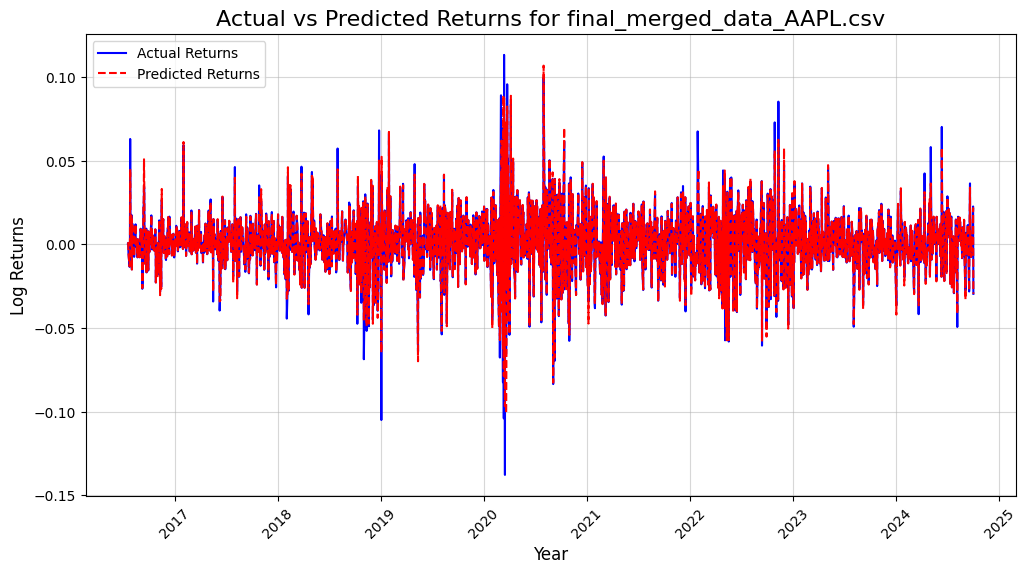

Saved results for final_merged_data_AAPL.csv.
Processing dataset: final_merged_data_FTSE 100.csv
Metrics for final_merged_data_FTSE 100.csv: {'MSE': 5.858863599623852e-06, 'MAE': 0.00037025429444916425, 'R²': 0.9362887176632272}


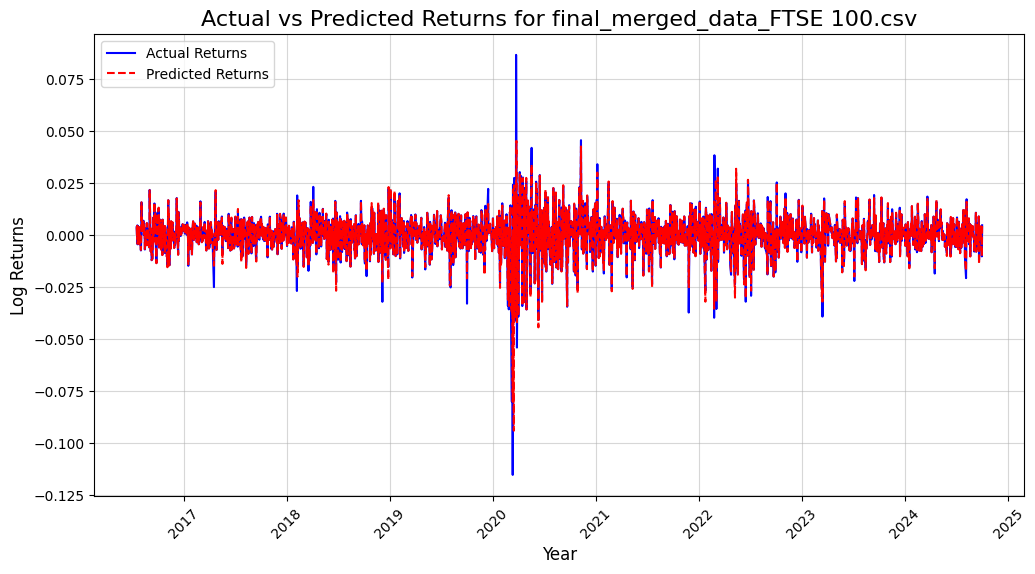

Saved results for final_merged_data_FTSE 100.csv.
Processing dataset: final_merged_data_NYSE.csv
Metrics for final_merged_data_NYSE.csv: {'MSE': 5.012721276703347e-06, 'MAE': 0.0004089362632420037, 'R²': 0.9584540191954768}


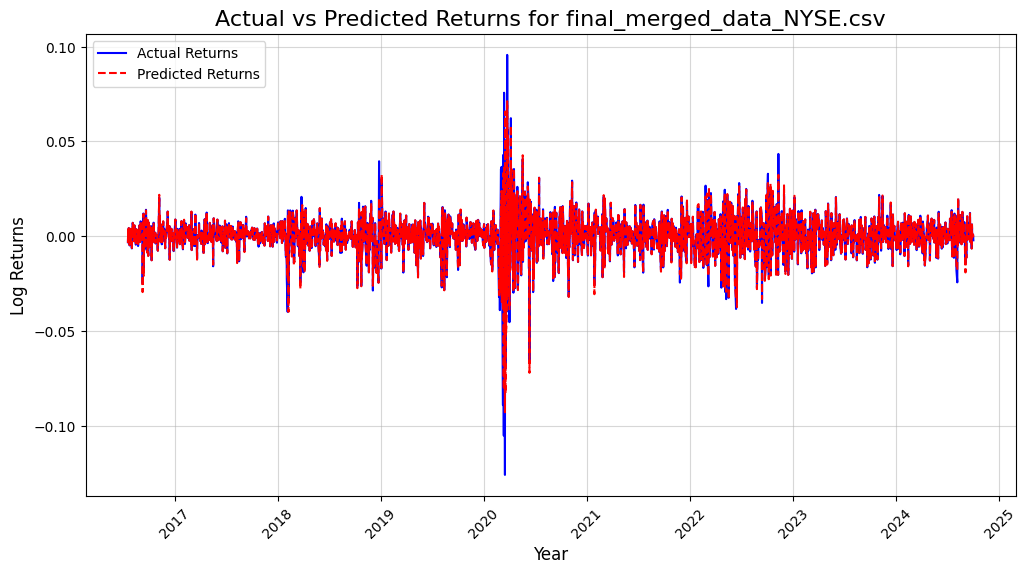

Saved results for final_merged_data_NYSE.csv.
Processing dataset: final_merged_data_S&P 500.csv
Metrics for final_merged_data_S&P 500.csv: {'MSE': 6.224470996234466e-06, 'MAE': 0.000450026057070009, 'R²': 0.9537845903715287}


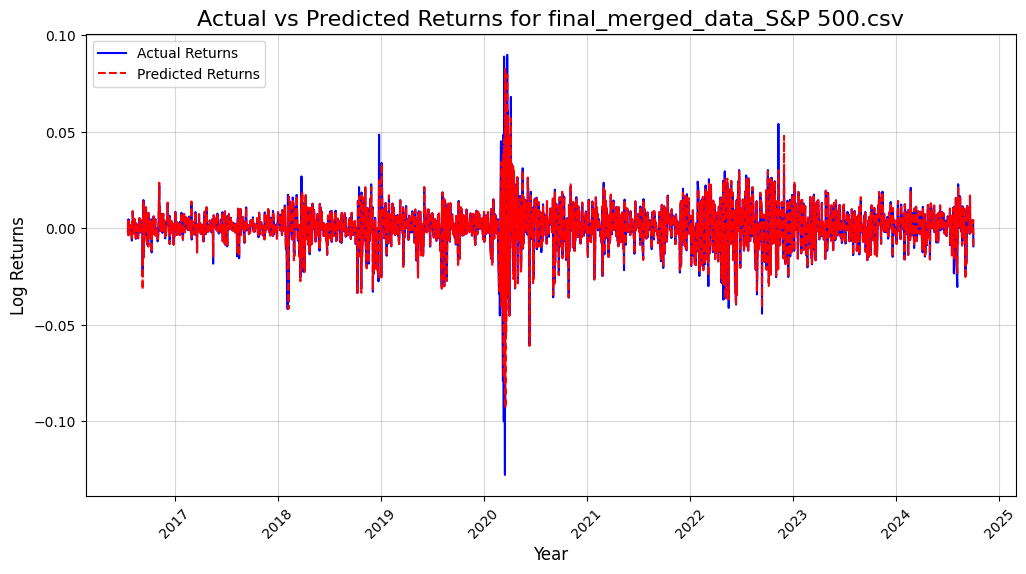

Saved results for final_merged_data_S&P 500.csv.
Saved Gradient Boosting metrics summary.


In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter

# Rolling Gradient Boosting Implementation
def rolling_gradient_boosting(data, window_size=200):
    """
    Apply rolling Gradient Boosting to predict log returns.

    Args:
        data (pd.DataFrame): The dataset containing 'log_return'.
        window_size (int): Rolling window size.

    Returns:
        pd.DataFrame: Dataframe with predicted returns and errors.
    """
    n = len(data)
    predictions = []
    errors = []

    for i in range(n - window_size):
        # Define rolling window
        train_data = data.iloc[i:i + window_size]
        X_train = train_data.drop(columns=['log_return'])
        y_train = train_data['log_return']

        # Test data
        test_data = data.iloc[i + window_size:i + window_size + 1]
        X_test = test_data.drop(columns=['log_return'])

        # Fit Gradient Boosting model
        try:
            model = GradientBoostingRegressor(random_state=42)
            model.fit(X_train, y_train)
            forecast = model.predict(X_test)[0]
            actual = test_data['log_return'].iloc[0]

            # Store results
            predictions.append(forecast)
            errors.append(actual - forecast)
        except Exception as e:
            predictions.append(np.nan)
            errors.append(np.nan)

    # Align results
    result = data.iloc[window_size:].copy()
    result['predicted_returns'] = predictions
    result['prediction_errors'] = errors
    return result

# Metrics Calculation
def evaluate_metrics(data):
    """
    Calculate MSE, MAE, and R² for actual vs predicted returns.

    Args:
        data (pd.DataFrame): Dataframe containing 'log_return' and 'predicted_returns'.

    Returns:
        dict: Dictionary of metrics (MSE, MAE, R²).
    """
    mse = mean_squared_error(data['log_return'], data['predicted_returns'])
    mae = mean_absolute_error(data['log_return'], data['predicted_returns'])
    r_squared = r2_score(data['log_return'], data['predicted_returns'])
    return {'MSE': mse, 'MAE': mae, 'R²': r_squared}

# Plot Actual vs Predicted Returns
def plot_predictions(data, dataset_name):
    """
    Plot actual vs predicted returns.

    Args:
        data (pd.DataFrame): Dataframe containing actual and predicted returns.
        dataset_name (str): Name of the dataset.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['log_return'], label="Actual Returns", color='blue', linewidth=1.5)
    plt.plot(data.index, data['predicted_returns'], label="Predicted Returns", color='red', linestyle='dashed', linewidth=1.5)
    plt.title(f"Actual vs Predicted Returns for {dataset_name}", fontsize=16)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Log Returns", fontsize=12)
    plt.legend(loc='upper left')
    plt.grid(alpha=0.5)
    plt.gca().xaxis.set_major_locator(YearLocator())
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
    plt.xticks(rotation=45)
    plt.savefig(f"{dataset_name}_gb_predictions.png", dpi=300)
    plt.show()

# Main Execution
datasets_results = {}
metrics_results = {}

for dataset_name, dataset in data_frames.items():
    print(f"Processing dataset: {dataset_name}")

    # Ensure datetime index
    dataset.index = pd.to_datetime(dataset.index, format='%d/%m/%Y')

    # Apply rolling Gradient Boosting
    results = rolling_gradient_boosting(dataset)
    datasets_results[dataset_name] = results

    # Evaluate metrics
    metrics = evaluate_metrics(results)
    metrics_results[dataset_name] = metrics
    print(f"Metrics for {dataset_name}: {metrics}")

    # Generate and save plot
    plot_predictions(results, dataset_name)

    # Save predictions and errors
    results.to_csv(f"{dataset_name}_gb_results.csv")
    print(f"Saved results for {dataset_name}.")

# Save metrics summary
metrics_df = pd.DataFrame(metrics_results).T
metrics_df.to_csv("gradient_boosting_metrics_summary.csv")
print("Saved Gradient Boosting metrics summary.")


In [16]:
from google.colab import drive
import pandas as pd
import numpy as np
from scipy.stats import t
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the directory path in Google Drive
directory_path = '/content/drive/MyDrive/predictions'

# Function to Load Results
def load_results(file_name):
    """
    Load predictions and actual returns from CSV file in Google Drive.
    """
    file_path = os.path.join(directory_path, file_name)  # Construct full path
    return pd.read_csv(file_path)  # Use the full path to load the file

# DM Test Function
def dm_test(errors_1, errors_2):
    """
    Perform Diebold-Mariano Test for predictive accuracy.

    Args:
        errors_1 (array-like): Forecast errors from the first model.
        errors_2 (array-like): Forecast errors from the second model.

    Returns:
        dict: DM Test results with t-stat and p-value.
    """
    d = errors_1**2 - errors_2**2
    mean_d = np.mean(d)
    var_d = np.var(d, ddof=1)
    dm_stat = mean_d / np.sqrt(var_d / len(d))
    p_value = 2 * (1 - t.cdf(np.abs(dm_stat), df=len(d) - 1))
    return {'t_stat': dm_stat, 'p_value': p_value}

# Generate Signals Function
def generate_signals(data, prediction_column, threshold=0):
    """
    Generate buy/sell signals based on predictions.

    Args:
        data (pd.DataFrame): DataFrame with predictions and actual returns.
        prediction_column (str): Name of the column containing predictions.
        threshold (float): Threshold for generating buy/sell signals.
    """
    signal_column = f"{prediction_column}_signal"
    strategy_column = f"{prediction_column}_strategy_returns"

    data[signal_column] = np.where(data[prediction_column] > threshold, 1, -1)
    data[strategy_column] = data[signal_column] * data['log_return']
    return data

# File Names for Each Dataset
datasets = {
    "AAPL": {
        "arima": "final_merged_data_AAPL.csv_arima_results.csv",
        "rf": "final_merged_data_AAPL.csv_rf_results.csv",
        "gb": "final_merged_data_AAPL.csv_gb_results.csv"
    },
    "FTSE_100": {
        "arima": "final_merged_data_FTSE 100.csv_arima_results.csv",
        "rf": "final_merged_data_FTSE 100.csv_rf_results.csv",
        "gb": "final_merged_data_FTSE 100.csv_gb_results.csv"
    },
    "NYSE": {
        "arima": "final_merged_data_NYSE.csv_arima_results.csv",
        "rf": "final_merged_data_NYSE.csv_rf_results.csv",
        "gb": "final_merged_data_NYSE.csv_gb_results.csv"
    },
    "S&P_500": {
        "arima": "final_merged_data_S&P 500.csv_arima_results.csv",
        "rf": "final_merged_data_S&P 500.csv_rf_results.csv",
        "gb": "final_merged_data_S&P 500.csv_gb_results.csv"
    }
}

# Initialize Results
dm_test_results = {}
signals_results = {}

# Iterate Over Datasets
for dataset_name, files in datasets.items():
    print(f"Processing dataset: {dataset_name}")

    try:
        # Load ARIMA, RF, and GB Results
        arima_data = load_results(files["arima"])
        rf_data = load_results(files["rf"])
        gb_data = load_results(files["gb"])

        # Ensure consistent alignment
        if 'predicted_returns' in arima_data.columns:
            arima_predictions = arima_data['predicted_returns']
            actual_returns = arima_data['log_return']
        else:
            print(f"Skipping {dataset_name}: ARIMA predictions not found.")
            continue

        if 'predicted_returns' in rf_data.columns:
            rf_predictions = rf_data['predicted_returns']
        else:
            print(f"Skipping {dataset_name}: RF predictions not found.")
            continue

        if 'predicted_returns' in gb_data.columns:
            gb_predictions = gb_data['predicted_returns']
        else:
            print(f"Skipping {dataset_name}: GB predictions not found.")
            continue

        # Calculate Forecast Errors
        arima_errors = actual_returns - arima_predictions
        rf_errors = actual_returns - rf_predictions
        gb_errors = actual_returns - gb_predictions

        # DM Test: ARIMA vs RF
        dm_arima_rf = dm_test(arima_errors, rf_errors)
        print(f"DM Test ARIMA vs RF: t-stat = {dm_arima_rf['t_stat']:.4f}, p-value = {dm_arima_rf['p_value']:.4f}")

        # DM Test: ARIMA vs GB
        dm_arima_gb = dm_test(arima_errors, gb_errors)
        print(f"DM Test ARIMA vs GB: t-stat = {dm_arima_gb['t_stat']:.4f}, p-value = {dm_arima_gb['p_value']:.4f}")

        # Save DM Test Results
        dm_test_results[dataset_name] = {
            'ARIMA vs RF': dm_arima_rf,
            'ARIMA vs GB': dm_arima_gb
        }

        # Generate Signals
        arima_data = generate_signals(arima_data, 'predicted_returns')
        rf_data = generate_signals(rf_data, 'predicted_returns')
        gb_data = generate_signals(gb_data, 'predicted_returns')

        # Combine Results for Signal Analysis
        signals_results[dataset_name] = {
            "arima": arima_data,
            "rf": rf_data,
            "gb": gb_data
        }

        # Save Signals to CSV
        arima_data.to_csv(f"{dataset_name}_arima_signals.csv", index=False)
        rf_data.to_csv(f"{dataset_name}_rf_signals.csv", index=False)
        gb_data.to_csv(f"{dataset_name}_gb_signals.csv", index=False)
        print(f"Signals saved for {dataset_name}.")

    except Exception as e:
        print(f"Error processing dataset {dataset_name}: {e}")

# Save DM Test Results
dm_results_df = pd.DataFrame(dm_test_results).T
dm_results_df.to_csv("dm_test_summary.csv")
print("DM Test results saved.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing dataset: AAPL
DM Test ARIMA vs RF: t-stat = 18.1931, p-value = 0.0000
DM Test ARIMA vs GB: t-stat = 17.8370, p-value = 0.0000
Signals saved for AAPL.
Processing dataset: FTSE_100
DM Test ARIMA vs RF: t-stat = 11.6560, p-value = 0.0000
DM Test ARIMA vs GB: t-stat = 11.0193, p-value = 0.0000
Signals saved for FTSE_100.
Processing dataset: NYSE
DM Test ARIMA vs RF: t-stat = 9.0039, p-value = 0.0000
DM Test ARIMA vs GB: t-stat = 8.7444, p-value = 0.0000
Signals saved for NYSE.
Processing dataset: S&P_500
DM Test ARIMA vs RF: t-stat = 10.9843, p-value = 0.0000
DM Test ARIMA vs GB: t-stat = 10.5733, p-value = 0.0000
Signals saved for S&P_500.
DM Test results saved.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing dataset: AAPL


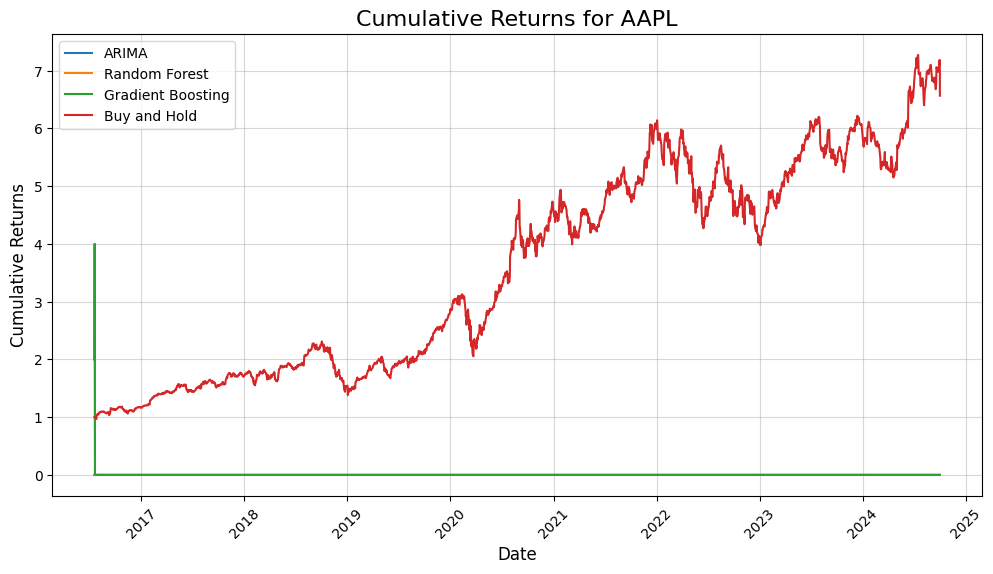

Saved cumulative returns for AAPL.
Processing dataset: FTSE_100


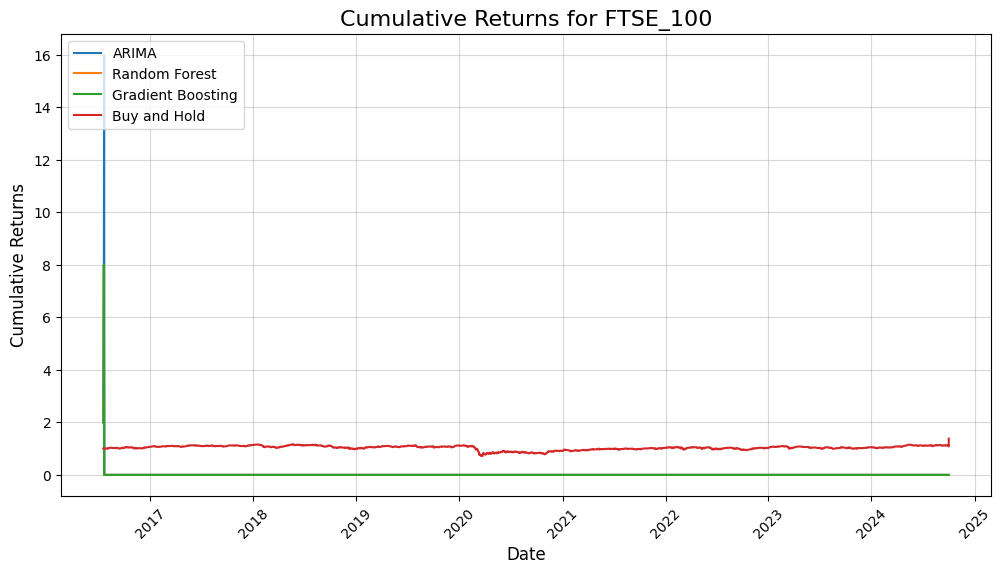

Saved cumulative returns for FTSE_100.
Processing dataset: NYSE


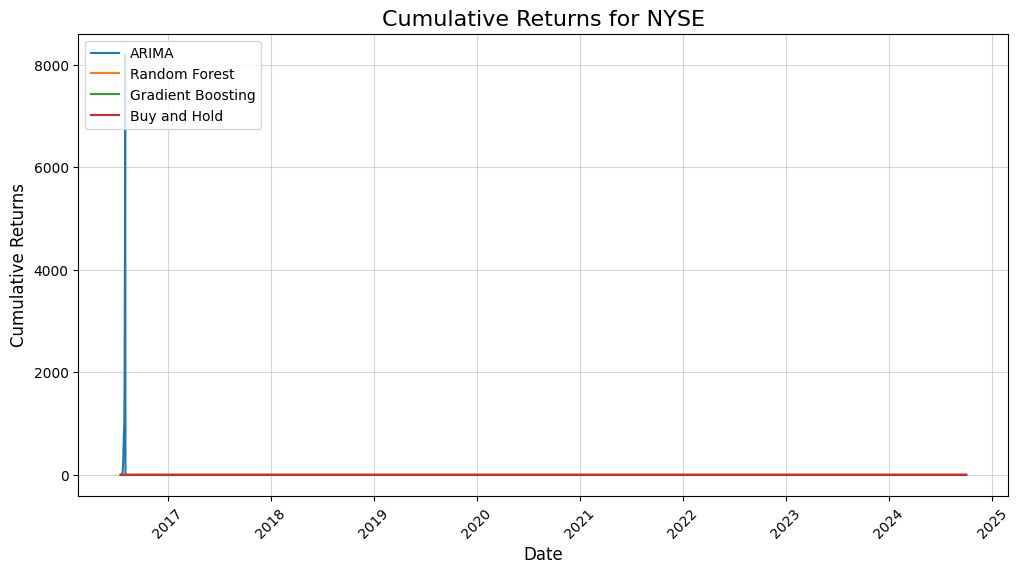

Saved cumulative returns for NYSE.
Processing dataset: S&P_500


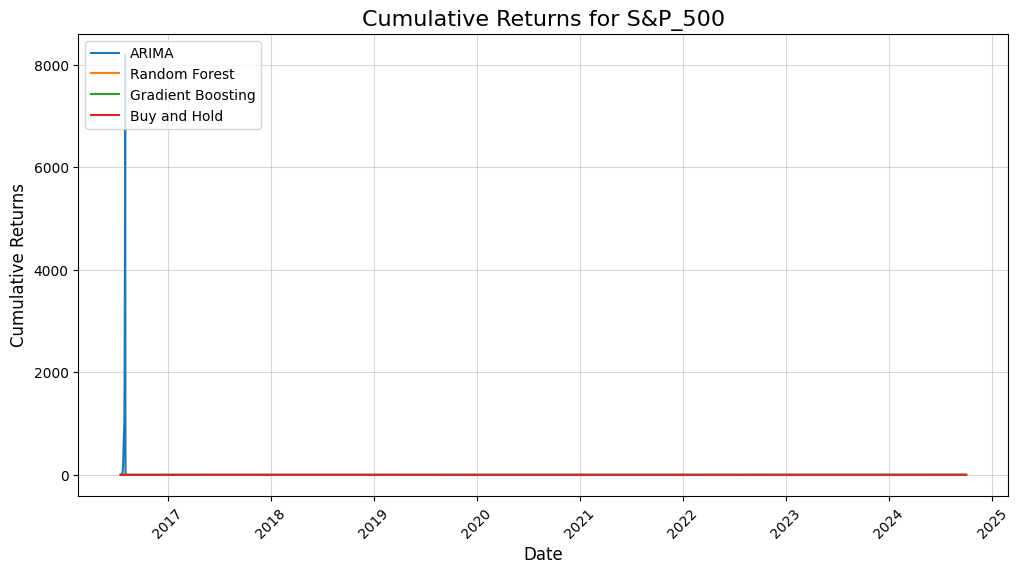

Saved cumulative returns for S&P_500.


In [19]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the directory path in Google Drive
directory_path = '/content/drive/MyDrive/signals'

# File Names for Each Dataset
datasets = {
    "AAPL": {
        "arima": "AAPL_arima_signals.csv",
        "rf": "AAPL_rf_signals.csv",
        "gb": "AAPL_gb_signals.csv"
    },
    "FTSE_100": {
        "arima": "FTSE_100_arima_signals.csv",
        "rf": "FTSE_100_rf_signals.csv",
        "gb": "FTSE_100_gb_signals.csv"
    },
    "NYSE": {
        "arima": "NYSE_arima_signals.csv",
        "rf": "NYSE_rf_signals.csv",
        "gb": "NYSE_gb_signals.csv"
    },
    "S&P_500": {
        "arima": "S&P_500_arima_signals.csv",
        "rf": "S&P_500_rf_signals.csv",
        "gb": "S&P_500_gb_signals.csv"
    }
}

# Function to load signal files
def load_signals(file_name):
    """
    Load signal data from CSV file.
    """
    file_path = os.path.join(directory_path, file_name)
    return pd.read_csv(file_path, index_col=0, parse_dates=True)

# Function to compute cumulative returns
def compute_cumulative_returns(data, column_name='predicted_returns_signal'):
    """
    Compute cumulative returns based on signals.
    """
    if column_name not in data.columns:
        raise ValueError(f"Column '{column_name}' not found in data.")
    return (data[column_name] + 1).cumprod()

# Function to visualize cumulative returns
def visualize_cumulative_returns(cumulative_returns_dict, dataset_name):
    """
    Visualize cumulative returns for ARIMA, RF, GB, and Buy-and-Hold.
    """
    plt.figure(figsize=(12, 6))
    for model_name, cum_returns in cumulative_returns_dict.items():
        plt.plot(cum_returns.index, cum_returns, label=model_name, linewidth=1.5)

    plt.title(f"Cumulative Returns for {dataset_name}", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Cumulative Returns", fontsize=12)
    plt.legend(loc="upper left")
    plt.grid(alpha=0.5)
    plt.xticks(rotation=45)
    plt.savefig(f"{dataset_name}_cumulative_returns.png", dpi=300)
    plt.show()

# Process each dataset
for dataset_name, signal_files in datasets.items():
    print(f"Processing dataset: {dataset_name}")

    try:
        # Load signals
        arima_signals = load_signals(signal_files['arima'])
        rf_signals = load_signals(signal_files['rf'])
        gb_signals = load_signals(signal_files['gb'])

        # Ensure signals are aligned by date
        combined_data = pd.DataFrame({
            "ARIMA": compute_cumulative_returns(arima_signals, column_name='predicted_returns_signal'),
            "Random Forest": compute_cumulative_returns(rf_signals, column_name='predicted_returns_signal'),
            "Gradient Boosting": compute_cumulative_returns(gb_signals, column_name='predicted_returns_signal'),
            "Buy and Hold": (arima_signals['log_return'] + 1).cumprod()  # Assuming all datasets have `log_return`
        })

        # Visualize cumulative returns
        visualize_cumulative_returns(combined_data, dataset_name)

        # Save the combined data
        combined_data.to_csv(f"/content/drive/MyDrive/{dataset_name}_cumulative_returns.csv")
        print(f"Saved cumulative returns for {dataset_name}.")
    except ValueError as e:
        print(f"Skipping {dataset_name} due to missing data: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing dataset: AAPL


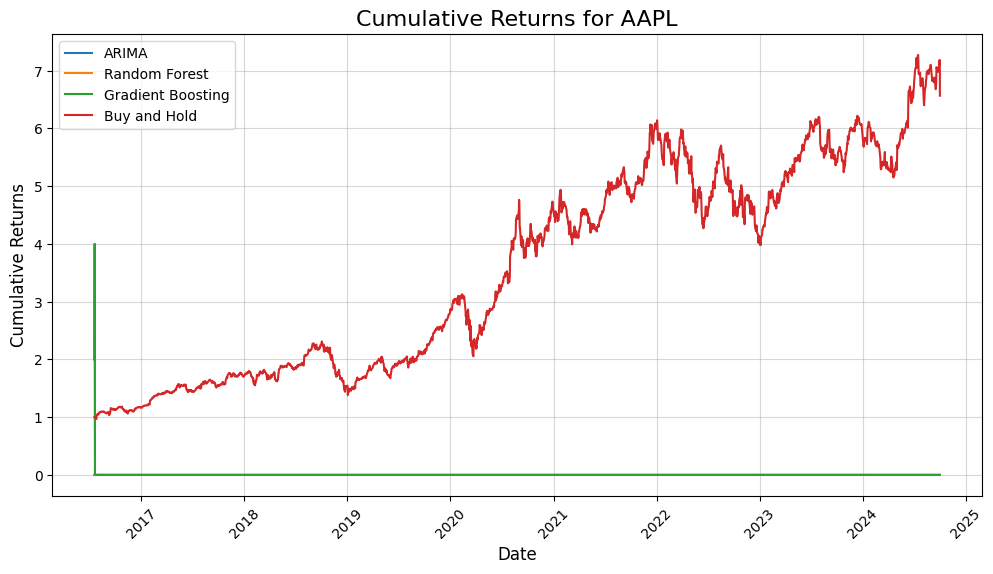

Saved cumulative returns for AAPL.
Processing dataset: FTSE_100


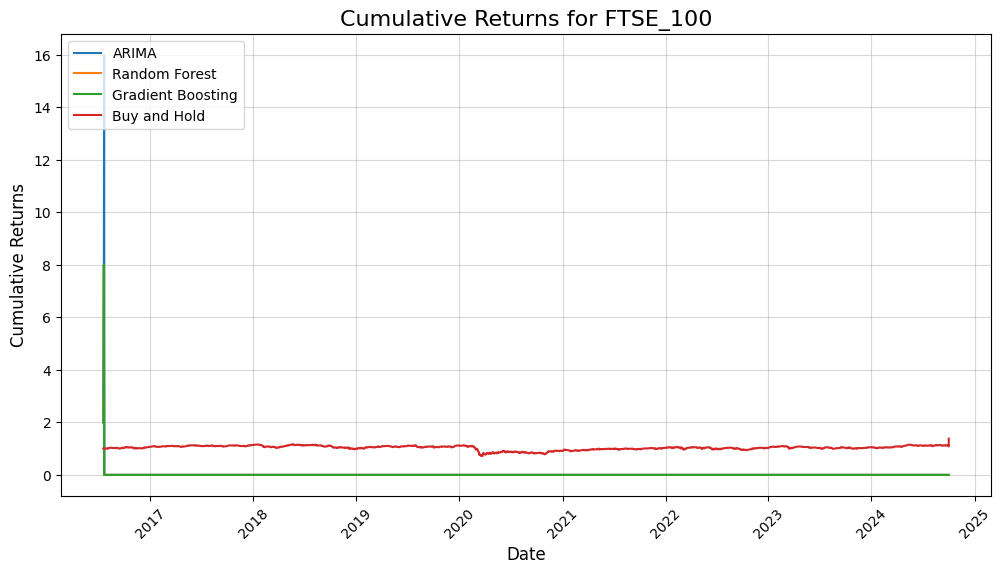

Saved cumulative returns for FTSE_100.
Processing dataset: NYSE


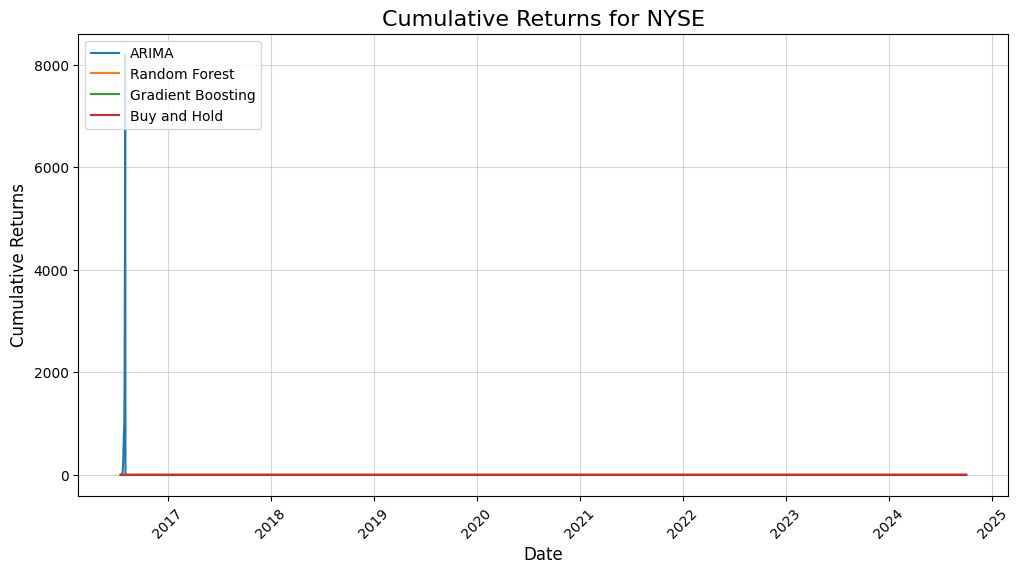

Saved cumulative returns for NYSE.
Processing dataset: S&P_500


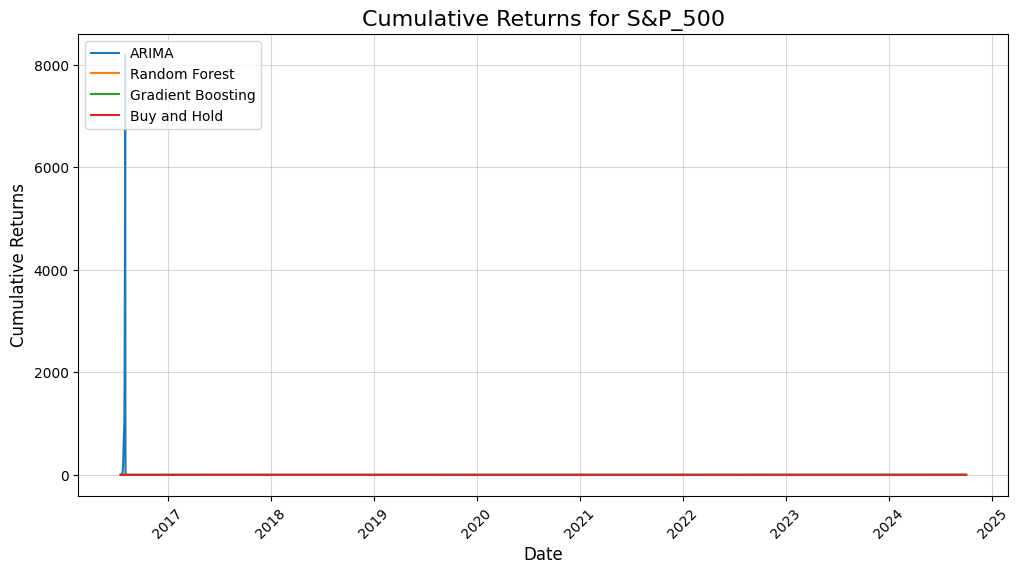

Saved cumulative returns for S&P_500.


In [24]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the directory path in Google Drive
directory_path = '/content/drive/MyDrive/signals'

# File Names for Each Dataset
datasets = {
    "AAPL": {
        "arima": "AAPL_arima_signals.csv",
        "rf": "AAPL_rf_signals.csv",
        "gb": "AAPL_gb_signals.csv"
    },
    "FTSE_100": {
        "arima": "FTSE_100_arima_signals.csv",
        "rf": "FTSE_100_rf_signals.csv",
        "gb": "FTSE_100_gb_signals.csv"
    },
    "NYSE": {
        "arima": "NYSE_arima_signals.csv",
        "rf": "NYSE_rf_signals.csv",
        "gb": "NYSE_gb_signals.csv"
    },
    "S&P_500": {
        "arima": "S&P_500_arima_signals.csv",
        "rf": "S&P_500_rf_signals.csv",
        "gb": "S&P_500_gb_signals.csv"
    }
}

# Function to load signal files
def load_signals(file_name):
    """
    Load signal data from CSV file.
    """
    file_path = os.path.join(directory_path, file_name)
    return pd.read_csv(file_path, index_col=0, parse_dates=True)

# Function to compute cumulative returns
def compute_cumulative_returns(data, column_name='predicted_returns_signal'):
    """
    Compute cumulative returns based on signals.
    """
    if column_name not in data.columns:
        raise ValueError(f"Column '{column_name}' not found in data.")
    return (data[column_name] + 1).cumprod()

# Function to compute Buy-and-Hold cumulative returns
def compute_buy_and_hold(data):
    """
    Compute cumulative returns for the Buy-and-Hold strategy using log returns.
    """
    if 'log_return' not in data.columns:
        raise ValueError("Column 'log_return' not found in data.")
    return (data['log_return'] + 1).cumprod()

# Function to visualize cumulative returns
def visualize_cumulative_returns(cumulative_returns_dict, dataset_name):
    """
    Visualize cumulative returns for ARIMA, RF, GB, and Buy-and-Hold.
    """
    plt.figure(figsize=(12, 6))
    for model_name, cum_returns in cumulative_returns_dict.items():
        plt.plot(cum_returns.index, cum_returns, label=model_name, linewidth=1.5)

    plt.title(f"Cumulative Returns for {dataset_name}", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Cumulative Returns", fontsize=12)
    plt.legend(loc="upper left")
    plt.grid(alpha=0.5)
    plt.xticks(rotation=45)
    plt.savefig(f"/content/drive/MyDrive/signals/{dataset_name}_cumulative_returns.png", dpi=300)
    plt.show()

# Process each dataset
for dataset_name, signal_files in datasets.items():
    print(f"Processing dataset: {dataset_name}")

    try:
        # Load signals
        arima_signals = load_signals(signal_files['arima'])
        rf_signals = load_signals(signal_files['rf'])
        gb_signals = load_signals(signal_files['gb'])

        # Calculate cumulative returns
        cumulative_returns_dict = {
            "ARIMA": compute_cumulative_returns(arima_signals, column_name='predicted_returns_signal'),
            "Random Forest": compute_cumulative_returns(rf_signals, column_name='predicted_returns_signal'),
            "Gradient Boosting": compute_cumulative_returns(gb_signals, column_name='predicted_returns_signal'),
            "Buy and Hold": compute_buy_and_hold(arima_signals)  # Assuming `log_return` exists in ARIMA signals
        }

        # Combine results into a DataFrame
        combined_data = pd.DataFrame(cumulative_returns_dict)

        # Visualize cumulative returns
        visualize_cumulative_returns(cumulative_returns_dict, dataset_name)

        # Save the combined data
        combined_data.to_csv(f"/content/drive/MyDrive/signals/{dataset_name}_cumulative_returns.csv")
        print(f"Saved cumulative returns for {dataset_name}.")
    except ValueError as e:
        print(f"Skipping {dataset_name} due to missing data: {e}")


In [29]:
import pandas as pd
import os

# Define the directory path in Google Drive
directory_path = '/content/drive/MyDrive/signals'

# File Names for Each Dataset
datasets = {
    "AAPL": {
        "arima": "AAPL_arima_signals.csv",
        "rf": "AAPL_rf_signals.csv",
        "gb": "AAPL_gb_signals.csv"
    },
    "FTSE_100": {
        "arima": "FTSE_100_arima_signals.csv",
        "rf": "FTSE_100_rf_signals.csv",
        "gb": "FTSE_100_gb_signals.csv"
    },
    "NYSE": {
        "arima": "NYSE_arima_signals.csv",
        "rf": "NYSE_rf_signals.csv",
        "gb": "NYSE_gb_signals.csv"
    },
    "S&P_500": {
        "arima": "S&P_500_arima_signals.csv",
        "rf": "S&P_500_rf_signals.csv",
        "gb": "S&P_500_gb_signals.csv"
    }
}

# Function to load signal files
def load_signals(file_name):
    """
    Load signal data from CSV file.
    """
    file_path = os.path.join(directory_path, file_name)
    return pd.read_csv(file_path, index_col=0, parse_dates=True)

# Function to compute Buy and Hold cumulative returns
def compute_buy_and_hold(data):
    """
    Compute Buy and Hold cumulative returns based on log returns.

    Args:
        data (pd.DataFrame): Data containing 'log_return'.

    Returns:
        pd.Series: Buy and Hold cumulative returns.
    """
    if 'log_return' not in data.columns:
        raise ValueError("Column 'log_return' not found in data.")
    return (data['log_return'] + 1).cumprod()

# Initialize summary storage
results = []

# Process each dataset
for dataset_name, signal_files in datasets.items():
    print(f"Processing dataset: {dataset_name}")

    try:
        # Load signals
        arima_signals = load_signals(signal_files['arima'])
        rf_signals = load_signals(signal_files['rf'])
        gb_signals = load_signals(signal_files['gb'])

        # Extract predicted strategy returns
        arima_strategy_returns = (arima_signals['predicted_returns_strategy_returns'] + 1).cumprod()
        rf_strategy_returns = (rf_signals['predicted_returns_strategy_returns'] + 1).cumprod()
        gb_strategy_returns = (gb_signals['predicted_returns_strategy_returns'] + 1).cumprod()

        # Calculate Buy and Hold returns
        buy_and_hold_returns = compute_buy_and_hold(arima_signals)

        # Combine all cumulative returns into a DataFrame
        combined_data = pd.DataFrame({
            "ARIMA Strategy": arima_strategy_returns,
            "Random Forest Strategy": rf_strategy_returns,
            "Gradient Boosting Strategy": gb_strategy_returns,
            "Buy and Hold": buy_and_hold_returns
        })

        # Calculate numerical summaries
        strategies = ['ARIMA Strategy', 'Random Forest Strategy', 'Gradient Boosting Strategy', 'Buy and Hold']
        cumulative_returns = [combined_data[col].iloc[-1] for col in strategies]
        annualized_returns = [(cum ** (1 / len(combined_data)) - 1) for cum in cumulative_returns]
        max_drawdowns = [
            (combined_data[col] / combined_data[col].cummax() - 1).min() for col in strategies
        ]

        # Append results for this dataset
        for strat, cum, ann, draw in zip(strategies, cumulative_returns, annualized_returns, max_drawdowns):
            results.append({
                'Dataset': dataset_name,
                'Strategy': strat,
                'Total Cumulative Return': cum,
                'Annualized Return': ann,
                'Max Drawdown': draw
            })

        # Save the combined data
        combined_data.to_csv(f"/content/drive/MyDrive/signals/{dataset_name}_cumulative_returns.csv")
        print(f"Saved cumulative returns for {dataset_name}.")

    except Exception as e:
        print(f"Skipping {dataset_name} due to error: {e}")

# Convert results to DataFrame and save
summary_df = pd.DataFrame(results)
summary_df.to_csv(f"/content/drive/MyDrive/signals/numerical_summaries.csv", index=False)
print("Numerical summaries saved.")


Processing dataset: AAPL
Saved cumulative returns for AAPL.
Processing dataset: FTSE_100
Saved cumulative returns for FTSE_100.
Processing dataset: NYSE
Saved cumulative returns for NYSE.
Processing dataset: S&P_500
Saved cumulative returns for S&P_500.
Numerical summaries saved.
